# WeatherPy
----

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output Files (CSV)
city_file = "Results/cities.csv"
coords_file = "Results/coords.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [10]:
# import alternate colorbar
from matplotlib.cm import coolwarm
import time as time
import scipy.stats as st

#current time
time_now = time.ctime()

## Generate Cities List

In [11]:
# #comment out code to stop regenerting random city lists

# # List for holding lat_lngs and cities
# random_coords = []
# cities = []
# countries = []
# cities_dict = {}

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
# lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# random_coords = zip(lats, lngs)

# # Identify nearest city for each lat, lng combination
# for lat_lng in random_coords:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#     country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
#     # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)
#         countries.append(country)

# #add lats and lngs to a list

# coord_list =list(zip(lats, lngs))

# # add lats and lngs to a dataframe
# coords_df = pd.DataFrame(coord_list)

# # #add cities and countries to a df and export to excel for recordkeeping

# cities_dict2 = {"City": cities, "Country" : countries}
# cities_dict2

# cities_df = pd.DataFrame(cities_dict2)
# cities_df

# coords_df.to_csv(coords_file)
# cities_df.to_csv(city_file)

In [17]:
#read csvs to keep list of cities static
cities2_df = pd.read_csv("Results/cities.csv")
coords_stat_df = pd.read_csv("Results/coords.csv")

#use this list of cities
cities2_ls = cities2_df["City"]

In [18]:
# Print the city count to confirm sufficient count
print(len(cities2_ls))

604


## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
#comment out code to stop performing API call 

#API documentation:
#URL examples
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
# api.openweathermap.org/data/2.5/weather?q={city name},{state code}&appid={API key}
# api.openweathermap.org/data/2.5/weather?q={city name},{state code},{country code}&appid={API key}
# coord: {lat, lon}, main:{temp,humidity}, wind{speed}, clouds{all}, id, name

# test_cities = ["New York City", "Mexico City"]
# city = ["New York City"]

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
lat2 = []
lng2 = []
temp = []
humid = []
cloud = []
wind = []
city_id = []
city_name = []
country = []

#Loop through the list of cities and perform a request for data on each
for city in cities2_ls:
    response = requests.get(query_url + city).json()
    
    try:
        lat2.append(response['coord']['lat'])
        lng2.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_id.append(response['id'])
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        time.sleep(1)
        print(f"City Number: {id}, City Name: {name}")
    
    except (KeyError):
        print("City weather data not found")
        pass

In [22]:
##Print lists to confirm they are the same length. some cities appear to have been deleted,
##possibly from passing exceptions  

# print(len(lat2))
# print(len(lng2))
# print(len(temp))
# print(len(humid))
# print(len(cloud))
# print(len(wind))
# print(len(city_id))
# print(len(city_name))
# print(len(country))

# create df with new data 
cities3_df = pd.DataFrame({"Lat": lat2, "Long": lng2, "Temp (F)": temp, "Humidity (%)": humid, 
                      "Cloudiness (%)": cloud, "Wind Speed (mph)": wind, "City ID": city_id, "City Name": city_name, 
                      "Country": country})


558
558
558
558
558
558
558
558
558


## Convert Raw Data to DataFrame
* Save as csv

In [24]:
weather_file = "Results/city_weather.csv"
cities3_df.to_csv(weather_file)

In [25]:
cities3_df.head()

,Lat,Long,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),City ID,City Name,Country
0,-13.70,-76.22,70.48,60,0,8.05,3932145,Pisco,PE
1,-54.80,-68.30,55.40,43,75,16.11,3833367,Ushuaia,AR
2,66.53,66.60,20.30,96,98,9.66,1493197,Salekhard,RU
3,-31.95,141.43,64.40,31,2,5.66,2173911,Broken Hill,AU
4,-33.93,18.42,58.96,77,0,16.11,3369157,Cape Town,ZA


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Temperature vs. Latitude Plot

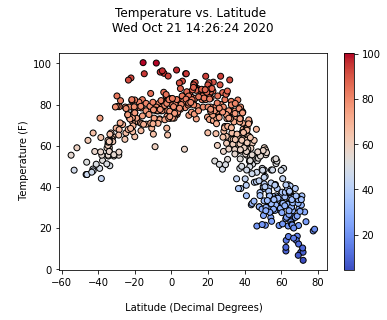

In [37]:
## Set axes
x_axis = cities3_df["Lat"]
y_axis = cities3_df["Temp (F)"]

##scatter plot
plot1 = plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", c=[y_axis], cmap=coolwarm)

clb = plt.colorbar()
plt.title(f"Temperature vs. Latitude \n {time_now} \n")
plt.xlabel("\n Latitude (Decimal Degrees)")
plt.ylabel("\n Temperature (F)")

fig1 = plt.gcf()
plt.show()
fig1.savefig("Results/Fig 01 - Temperature vs Lat", dpi=100)

### Humidity vs. Latitude Plot

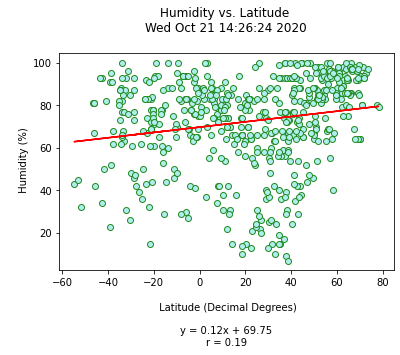

In [38]:
## Set axes
x_axis = cities3_df["Lat"]
y_axis = cities3_df["Humidity (%)"]

#parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")

# Calculate the correlation coefficient and linear regression model 
pearsonr = st.pearsonr(x_axis, y_axis)
r_display = str(round(pearsonr[0],2))

##scatter plot
plot2 = plt.scatter(x_axis, y_axis, marker="o", facecolors="paleturquoise", edgecolors="forestgreen")
plt.title("Humidity vs. Latitude \n" + time_now + "\n")
plt.xlabel("\n Latitude (Decimal Degrees)" + "\n" + "\n" + line_eq + "\n" + "r = " + r_display)
plt.ylabel("\n Humidity (%)")

fig2 = plt.gcf()
plt.show()
fig2.savefig("Results/Fig 02 - Humidity vs Lat", dpi=100)

### Cloudiness vs. Latitude Plot

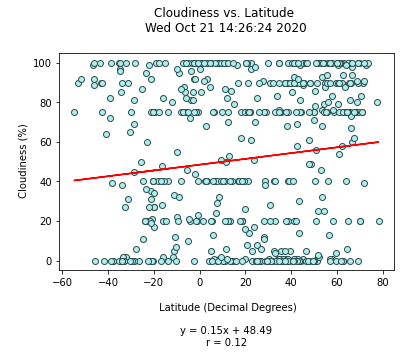

In [39]:
## Set axes
x_axis = cities3_df["Lat"]
y_axis = cities3_df["Cloudiness (%)"]

#parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")

# Calculate the correlation coefficient and linear regression model 
pearsonr = st.pearsonr(x_axis, y_axis)
r_display = str(round(pearsonr[0],2))

##scatter plot
plot3 = plt.scatter(x_axis, y_axis, marker="o", facecolors="paleturquoise", edgecolors="darkslategray")
plt.title("Cloudiness vs. Latitude \n" + time_now + "\n")
plt.xlabel("\n Latitude (Decimal Degrees)" + "\n" + "\n" + line_eq + "\n" + "r = " + r_display)
plt.ylabel("\n Cloudiness (%)")

fig3 = plt.gcf()
plt.show()
fig3.savefig("Results/Fig 03 - Cloudiness vs Lat", dpi=100)

### Wind Speed vs. Latitude Plot

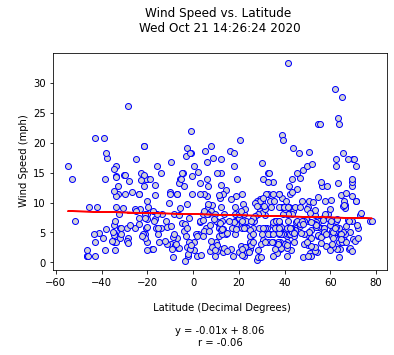

In [40]:
## Set axes
x_axis = cities3_df["Lat"]
y_axis = cities3_df["Wind Speed (mph)"]

#parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")

# Calculate the correlation coefficient and linear regression model 
pearsonr = st.pearsonr(x_axis, y_axis)
r_display = str(round(pearsonr[0],2))

##scatter plot
plot4 = plt.scatter(x_axis, y_axis, marker="o", facecolors="lightgray", edgecolors="blue")
plt.title("Wind Speed vs. Latitude \n" + time_now + "\n")
plt.xlabel("\n Latitude (Decimal Degrees)" + "\n" + "\n" + line_eq + "\n" + "r = " + r_display)
plt.ylabel("\n Wind Speed (mph)")

fig4 = plt.gcf()
plt.show()
fig4.savefig("Results/Fig 04 - Wind Speed vs Lat", dpi=100)

## Linear Regression

### Write linear regression plot function (optional)

In [41]:
## see above

### Northern and Souther Hemisphere - Identify  Max Temps

In [42]:
headers = cities3_df.head(0)
headers

,Lat,Long,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),City ID,City Name,Country


In [43]:
north_df = cities3_df[cities3_df["Lat"] > 0]
north_t_max = north_df["Temp (F)"].max()
north_t_max

south_df = cities3_df[cities3_df["Lat"] < 0]
south_t_max = south_df["Temp (F)"].max()
south_t_max

print("The maximum temperature in the Northern Hemisphere was " + str(north_t_max) + " degrees Fahrenheit")
print("The maximum temperature in the Southern Hemisphere was " + str(south_t_max) + " degrees Fahrenheit")


The maximum temperature in the Northern Hemisphere was 96.8 degrees Fahrenheit
The maximum temperature in the Southern Hemisphere was 100.4 degrees Fahrenheit


###  Northern Hemisphere - Temp vs. Latitude Linear Regression

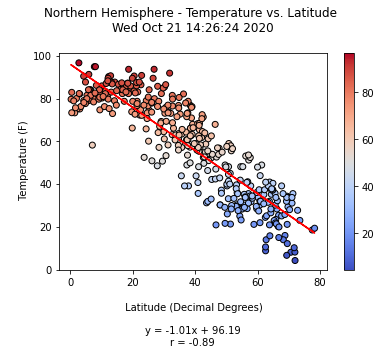

In [44]:
## Set axes
x_axis = north_df["Lat"]
y_axis = north_df["Temp (F)"]

#parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")

# Calculate the correlation coefficient and linear regression model 
pearsonr = st.pearsonr(x_axis, y_axis)
r_display = str(round(pearsonr[0],2))

##scatter plot
plot5 = plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", c=[y_axis], cmap=coolwarm)

clb = plt.colorbar()
plt.title(f"Northern Hemisphere - Temperature vs. Latitude \n" + time_now + "\n")
plt.xlabel("\n Latitude (Decimal Degrees)" + "\n" + "\n" + line_eq + "\n" + "r = " + r_display)
plt.ylabel("\n Temperature (F)")

fig5 = plt.gcf()
plt.show()
fig5.savefig("Results/Fig 05 - NorthHemi - Temperature vs Lat", dpi=100)

###  Southern Hemisphere -  Temp vs. Latitude Linear Regression

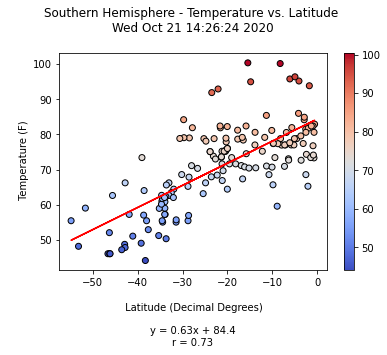

In [45]:
## Set axes
x_axis = south_df["Lat"]
y_axis = south_df["Temp (F)"]

#parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")

# Calculate the correlation coefficient and linear regression model 
pearsonr = st.pearsonr(x_axis, y_axis)
r_display = str(round(pearsonr[0],2))

##scatter plot
plot6 = plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", c=[y_axis], cmap=coolwarm)

clb = plt.colorbar()
plt.title(f"Southern Hemisphere - Temperature vs. Latitude \n" + time_now + "\n")
plt.xlabel("\n Latitude (Decimal Degrees)" + "\n" + "\n" + line_eq + "\n" + "r = " + r_display)
plt.ylabel("\n Temperature (F)")


fig6 = plt.gcf()
plt.show()
fig6.savefig("Results/Fig 06 - SouthHemi - Temperature vs Lat", dpi=100)

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

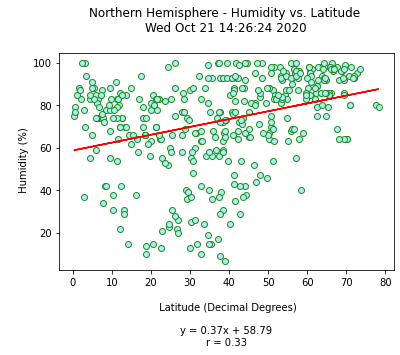

In [46]:
## Set axes
x_axis = north_df["Lat"]
y_axis = north_df["Humidity (%)"]

#parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")

# Calculate the correlation coefficient and linear regression model 
pearsonr = st.pearsonr(x_axis, y_axis)
r_display = str(round(pearsonr[0],2))

##scatter plot
plot7 = plt.scatter(x_axis, y_axis, marker="o", facecolors="paleturquoise", edgecolors="forestgreen")
plt.title("Northern Hemisphere - Humidity vs. Latitude \n" + time_now + "\n")
plt.xlabel("\n Latitude (Decimal Degrees)" + "\n" + "\n" + line_eq + "\n" + "r = " + r_display)
plt.ylabel("\n Humidity (%)")

fig7 = plt.gcf()
plt.show()
fig7.savefig("Results/Fig 07 - NorthHemi - Humidity vs Lat", dpi=100)

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

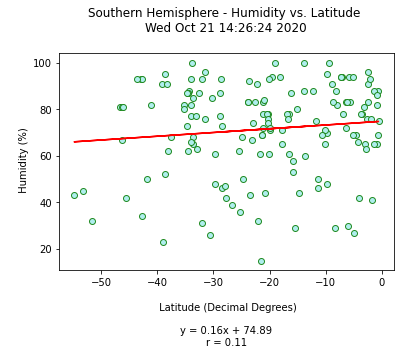

In [48]:
## Set axes
x_axis = south_df["Lat"]
y_axis = south_df["Humidity (%)"]

#parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")

# Calculate the correlation coefficient and linear regression model 
pearsonr = st.pearsonr(x_axis, y_axis)
r_display = str(round(pearsonr[0],2))

##scatter plot
plot8 = plt.scatter(x_axis, y_axis, marker="o", facecolors="paleturquoise", edgecolors="forestgreen")
plt.title("Southern Hemisphere - Humidity vs. Latitude \n" + time_now + "\n")
plt.xlabel("\n Latitude (Decimal Degrees)" + "\n" + "\n" + line_eq + "\n" + "r = " + r_display)
plt.ylabel("\n Humidity (%)")

fig8 = plt.gcf()
plt.show()
fig8.savefig("Results/Fig 08 - SouthHemi - Humidity vs Lat", dpi=100)

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

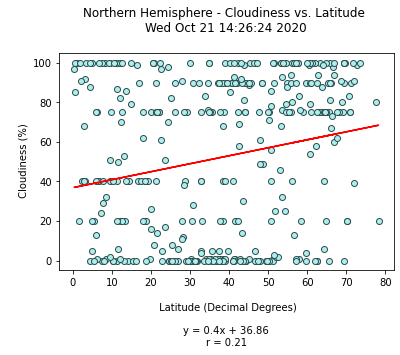

In [49]:
## Set axes
x_axis = north_df["Lat"]
y_axis = north_df["Cloudiness (%)"]

#parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")

# Calculate the correlation coefficient and linear regression model 
pearsonr = st.pearsonr(x_axis, y_axis)
r_display = str(round(pearsonr[0],2))

##scatter plot
plot9 = plt.scatter(x_axis, y_axis, marker="o", facecolors="paleturquoise", edgecolors="darkslategray")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude \n" + time_now + "\n")
plt.xlabel("\n Latitude (Decimal Degrees)" + "\n" + "\n" + line_eq + "\n" + "r = " + r_display)
plt.ylabel("\n Cloudiness (%)")

fig9 = plt.gcf()
plt.show()
fig9.savefig("Results/Fig 09 - NorthHemi - Cloudiness vs Lat", dpi=100)

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

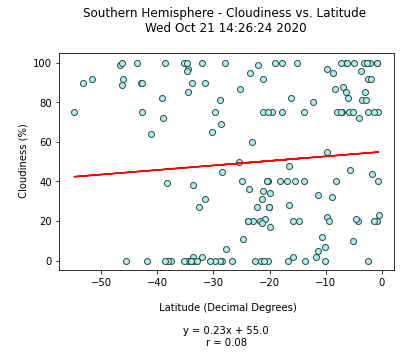

In [50]:
## Set axes
x_axis = south_df["Lat"]
y_axis = south_df["Cloudiness (%)"]

#parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")

# Calculate the correlation coefficient and linear regression model 
pearsonr = st.pearsonr(x_axis, y_axis)
r_display = str(round(pearsonr[0],2))

##scatter plot
plot10 = plt.scatter(x_axis, y_axis, marker="o", facecolors="paleturquoise", edgecolors="darkslategray")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude \n" + time_now + "\n")
plt.xlabel("\n Latitude (Decimal Degrees)" + "\n" + "\n" + line_eq + "\n" + "r = " + r_display)
plt.ylabel("\n Cloudiness (%)")

fig10 = plt.gcf()
plt.show()
fig10.savefig("Results/Fig 10 - SouthHemi - Cloudiness vs Lat", dpi=100)

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

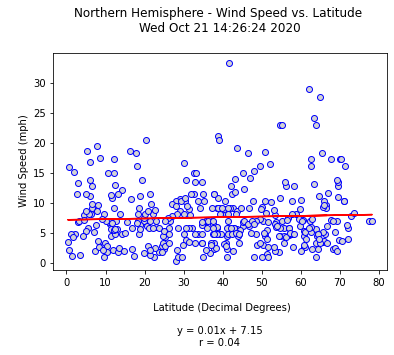

In [51]:
## Set axes
x_axis = north_df["Lat"]
y_axis = north_df["Wind Speed (mph)"]

#parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")

# Calculate the correlation coefficient and linear regression model 
pearsonr = st.pearsonr(x_axis, y_axis)
r_display = str(round(pearsonr[0],2))

##scatter plot
plot11 = plt.scatter(x_axis, y_axis, marker="o", facecolors="lightgray", edgecolors="blue")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude \n" + time_now + "\n")
plt.xlabel("\n Latitude (Decimal Degrees)" + "\n" + "\n" + line_eq + "\n" + "r = " + r_display)
plt.ylabel("\n Wind Speed (mph)")

fig11 = plt.gcf()
plt.show()
fig11.savefig("Results/Fig 11 - NorthHemi - Wind Speed vs Lat", dpi=100)

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

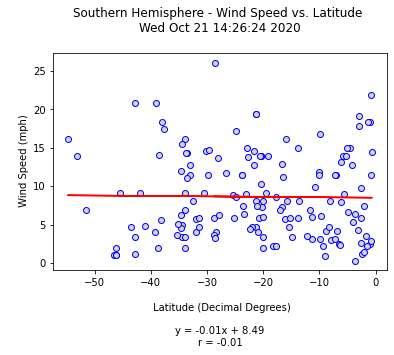

In [52]:
## Set axes
x_axis = south_df["Lat"]
y_axis = south_df["Wind Speed (mph)"]

#parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis, regress_values, "r-")

# Calculate the correlation coefficient and linear regression model 
pearsonr = st.pearsonr(x_axis, y_axis)
r_display = str(round(pearsonr[0],2))

##scatter plot
plot12 = plt.scatter(x_axis, y_axis, marker="o", facecolors="lightgray", edgecolors="blue")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude \n" + time_now + "\n")
plt.xlabel("\n Latitude (Decimal Degrees)" + "\n" + "\n" + line_eq + "\n" + "r = " + r_display)
plt.ylabel("\n Wind Speed (mph)")

fig12 = plt.gcf()
plt.show()
fig12.savefig("Results/Fig 12 - SouthHemi - Wind Speed vs Lat", dpi=100)

## Results Discussion

#  
#
#